In [1]:
import numpy as np

import matplotlib.pylab as plt

%matplotlib inline

import fof

/Users/rokstar/miniconda/lib/python2.7/site-packages/matplotlib/__init__.py:486: UserWarning: matplotlibrc text.usetex option can not be used unless TeX-3.1415 or later is installed on your system
  'installed on your system') % tex_req)
/Users/rokstar/miniconda/lib/python2.7/site-packages/matplotlib/__init__.py:493: UserWarning: matplotlibrc text.usetex can not be used with *Agg backend unless dvipng-1.5 or later is installed on your system
  warnings.warn('matplotlibrc text.usetex can not be used with *Agg '
/Users/rokstar/miniconda/lib/python2.7/site-packages/matplotlib/__init__.py:508: UserWarning: matplotlibrc text.usetex can not be used unless ghostscript-7.07 or later is installed on your system
  'installed on your system') % gs_req)


In [2]:
# create the arrays
pdt = np.dtype([('pos','f4', 3), ('iGroup', 'i4'), ('iOrder', 'i4')])
nps = 1000000
ngs = 5
particles = np.zeros(nps, dtype=pdt)
done_ps = 0
centers = np.random.rand(ngs,3)*2 - 1
for group, center in zip(range(ngs), centers): 
    group_ps = nps/ngs
    if nps - (done_ps + group_ps) < group_ps:
        group_ps = nps - done_ps 
    particles['pos'][done_ps:done_ps+group_ps] = \
        np.random.multivariate_normal(center, [[.001,0,0],[0,.001,0],[0,0,.001]], group_ps)
    done_ps += group_ps
   
particles['iOrder'] = range(nps)

/Users/rokstar/miniconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


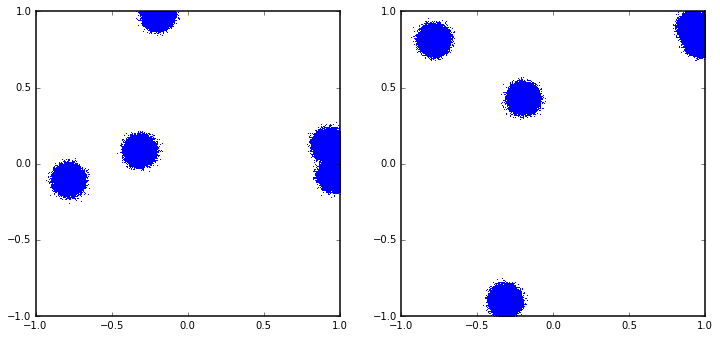

In [3]:
f, axs = plt.subplots(1,2, subplot_kw={'aspect':'equal'}, figsize=(12,12))
axs[0].plot(particles['pos'][:,0], particles['pos'][:,1], ',')
axs[1].plot(particles['pos'][:,0], particles['pos'][:,2], ',')
for ax in axs:
    ax.set_xlim(-1,1); ax.set_ylim(-1,1)

In [5]:
%time fof.run(particles, 0.02)

CPU times: user 27.8 s, sys: 70.7 ms, total: 27.9 s
Wall time: 27.9 s


5

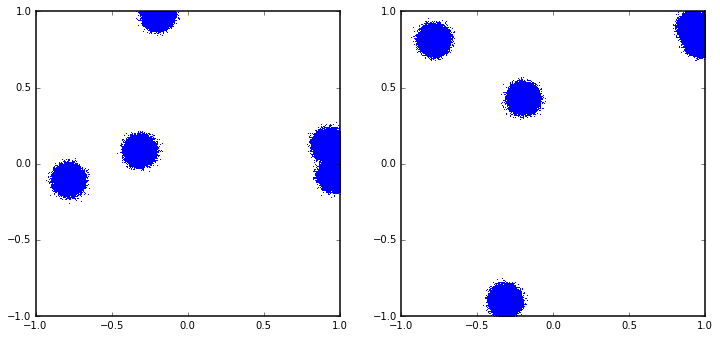

In [4]:
f, axs = plt.subplots(1,2, subplot_kw={'aspect':'equal'}, figsize=(12,12))
for group in range(ngs+1): 
    inds = np.where(particles['iGroup'] == group)[0]
    axs[0].plot(particles['pos'][inds,0], particles['pos'][inds,1], ',')
    axs[1].plot(particles['pos'][inds,0], particles['pos'][inds,2], ',')
for ax in axs:
    ax.set_xlim(-1,1); ax.set_ylim(-1,1)

In [32]:
setup = """
import fof
import numpy as np
import spark_fof_c
mins=np.array([0.,0.,0.])
maxs=np.array([1.,1.,1.])
point=np.array([0.5,0.5,0.5])
mins_32 = mins.astype(np.float32)
maxs_32 = maxs.astype(np.float32)
point_32 = point.astype(np.float32)
"""

In [31]:
timeit.repeat("fof.call_check_within(mins_32, maxs_32, point_32)", setup=setup, repeat=10, number=100000)

[0.9535839557647705,
 0.8923609256744385,
 0.9031839370727539,
 0.8951680660247803,
 0.9193241596221924,
 0.898425817489624,
 0.9142448902130127,
 0.8969850540161133,
 0.8992099761962891,
 0.8953008651733398]

In [33]:
timeit.repeat("spark_fof_c.in_rectangle_cython(mins,maxs,point_32)", setup=setup, repeat=10, number=100000)

[0.34435105323791504,
 0.32041287422180176,
 0.312014102935791,
 0.33949804306030273,
 0.3078649044036865,
 0.358288049697876,
 0.3667490482330322,
 0.31624603271484375,
 0.3298821449279785,
 0.3383769989013672]

In [13]:
import spark_fof_c

In [35]:
%%timeit mins=np.array([0.,0.,0.]); maxs=np.array([1.,1.,1.]); \
point=np.array([0.5,0.5,0.5]); mins_32 = mins.astype(np.float32); \
maxs_32 = maxs.astype(np.float32); point_32 = point.astype(np.float32);

fof.call_check_within(mins_32, maxs_32, point_32)

100000 loops, best of 3: 13.9 µs per loop


In [34]:
%timeit spark_fof_c.in_rectangle_cython(mins,maxs,point_32)

The slowest run took 6.14 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.11 µs per loop
